In [19]:
# Add the parent directory to the path so that we can import the src module
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from src.segmentation.antismear import AntiSmear
from src.segmentation.ellipse import Ellipse, draw_ellipse_on_image
from src.fileutils import PROJECT_ROOT

In [21]:
anti_smear_data_dir = PROJECT_ROOT / 'data' / 'smear_images'

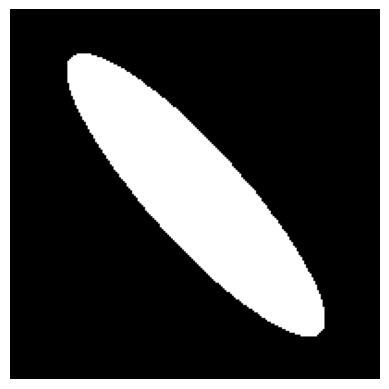

In [22]:
# Create an image of an ellipse and threshold
ellipse = Ellipse(100, 100, 100, 25, 48)
empty_img = np.zeros((200, 200, 3), dtype=np.uint8)
ellipse_img = draw_ellipse_on_image(empty_img, ellipse, (255, 255, 255), -1)

# Remember that the x-axis of an image is at the top and positive y is downwards
# This is why plotted image may look flipped in y-direction

ret, mask = cv2.threshold(ellipse_img, 0, 200, cv2.THRESH_BINARY)
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.show()

In [23]:
antismear = AntiSmear()
# When setting ball_speed, remember that positive y is downwards in the image
og_ball, smear = antismear.find_original_ball(mask, ball_speed_x=0.1, ball_speed_y=-2) 
print(smear.angle)

228.0398712158203


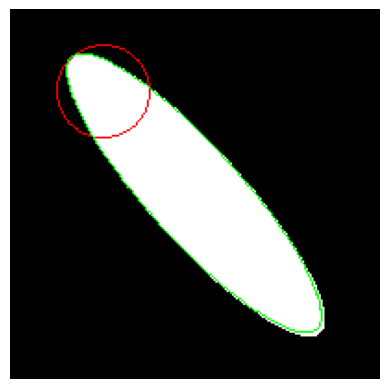

In [24]:
result_image = draw_ellipse_on_image(ellipse_img, og_ball, (0, 0, 255), 1)
result_image = draw_ellipse_on_image(result_image, smear, (0, 255, 0), 1)

# Display the result image
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()